In [23]:
from sensray import PlanetModel, PlanetMesh, CoordinateConverter


In [24]:
my_model = PlanetModel.from_standard_model('prem')
print(my_model.get_discontinuities())


[1221.5, 3480.0, 6346.6]


In [25]:
# Create mesh and save if not exist, otherwise load existing
mesh_path = "prem_mesh.vtu"
try:
    my_model.create_mesh(from_file=mesh_path)
    print(f"Loaded existing mesh from {mesh_path}")
except FileNotFoundError:
    print("Creating new mesh...")
    radii = [1221.5, 3480.0, 6371]
    H_layers = [500, 500, 300]
    my_model.create_mesh(mesh_size_km=1000, radii=radii, H_layers=H_layers)
    my_model.mesh.populate_properties(['vp', 'vs', 'rho'])
    my_model.mesh.save("prem_mesh.vtu")  # Save mesh to VT

Loaded mesh from prem_mesh.vtu.vtu
Loaded metadata: 136855 cells, 26449 points
Loaded existing mesh from prem_mesh.vtu


In [26]:
source_lat, source_lon, source_depth = 0.0, 0.0, 100.0
receiver_lat, receiver_lon = 30.0, 40.0,

plane_normal = CoordinateConverter.compute_gc_plane_normal(
    source_lat,
    source_lon,
    receiver_lat,
    receiver_lon,
    radius_km=my_model.radius
)

my_model.mesh.plot_cross_section(plane_normal, property_name="vp").show()

Widget(value='<iframe src="http://localhost:42087/index.html?ui=P_0x7fb1c98e3110_2&reconnect=auto" class="pyvi…

/tmp/ipykernel_2405596/305394845.py:9: ObsPyDeprecationWarning: The plot() function is deprecated. Please use arrivals.plot_rays()
  rays.plot()


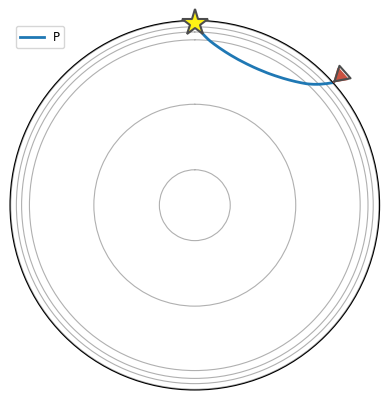

<PolarAxes: >

In [31]:
phases_list = ["P"]
rays = my_model.taupy_model.get_ray_paths_geo(source_latitude_in_deg=source_lat,
                                      source_longitude_in_deg=source_lon,
                                      source_depth_in_km=source_depth,
                                      receiver_latitude_in_deg=receiver_lat,
                                      receiver_longitude_in_deg=receiver_lon,
                                      phase_list=phases_list)

rays.plot()

In [32]:
print(rays)  # rays is a PyVista Plotter object

1 arrivals
	P phase arrival at 511.722 seconds


In [36]:
my_model.mesh.add_ray_to_mesh(rays[0], ray_name="P_ray_1")

Stored ray path lengths as cell data: 'ray_P_ray_1_P_lengths'


array([0., 0., 0., ..., 0., 0., 0.], shape=(136855,))